# Complex Sentiment Analysis
### Frequency of positive and negaitive words from a Sentiment Lexicon appearing in a dataset

#### Opening data files

The needed positive and negative word lists are .csv files found in the [PresidentSentiment/data](https://github.com/cyberdh/Text-Analysis/tree/master/PresidentSentiment/data) folder. You will need to move the word lists and data files to be in the same folder as the script file, or change the script so that the file path points to the folder where the word lists and data files are located.

##### NOTE: Make sure you have read and completed the instructions in [installJupyterMacPC.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/installJupyterMacPC.ipynb)



##### Now we load the negative words

Notice that we have added words to the negative list. Feel free to change the words you want to add based on the text you are doing sentiment analysis on. If you want to remove a word from the list simply add to the script the following line: If 'yourWord' in negTokens: negTokens.remove('yourWord'). If you do not wish to add words simply put a '#' (minus the quotes) in front of the lines that add words. These would be 'negAdds =' and 'negTokens.extend(negAdds)'.

##### NOTE: If you do not want to move the data files into the same folder as the script, you will need to add the path that leads to the folder where the file is located. For example: ("~/Text-Analysis/PresidentSentiment/data/negativeUIC.csv") where it says ("negativeUIC.csv"). This will work on Karst or Mac. If you are using a PC you will need to use an absolute path: ("C:\Text-Analysis\PresidentSentiment\data\negativeUIC.csv") and make sure you use the back slash (\) instead of forward slash (/).

In [1]:
import pandas as pd
import re


negText = pd.read_csv("/N/u/klosteda/Karst/Text-Analysis/PresidentSentiment/data/negativeUIC.csv")
negTokens = negText['Neg'].tolist()
negAdds = ['nuke'] 
negTokens.extend(negAdds)
print(negTokens[-10:])

# list to set for efficient lookup
negTokens = set(negTokens)

['wrought', 'yawn', 'zap', 'zapped', 'zaps', 'zealot', 'zealous', 'zealously', 'zombie', 'nuke']


###### Now we load the positive words

Notice that we have added words to the positive word list and removed other words from the positive word list. Simply change the words if you wish to add different words and the same with the words being removed. If you do not wish to add or remove simply put a '#' (minus the quotes) in front of the lines that add words and/or the lines that remove words.

In [2]:
posText = pd.read_csv("/N/u/klosteda/Karst/Text-Analysis/PresidentSentiment/data/positiveUIC.csv")
posTokens = posText['Pos'].tolist()
posAdds = ['theresistance','uniteblue']
posTokens.extend(posAdds)
if 'trump' in posTokens: posTokens.remove('trump')
if 'right' in posTokens: posTokens.remove('right')
print(posTokens[-10:])

# list to set for efficient lookup
posTokens = set(posTokens)

['wowing', 'wows', 'yay', 'youthful', 'zeal', 'zenith', 'zest', 'zippy', 'theresistance', 'uniteblue']


###### Here we get the tweets

In [3]:
tweetsText = pd.read_csv("/N/u/klosteda/Karst/Text-Analysis/PresidentSentiment/data/trump100days.csv", encoding = 'ISO-8859-1')
tweetsText['text'] = tweetsText['text'].str.replace('[^\x00-\x7F]','')
tweetsText['text'] = tweetsText['text'].str.replace('[^\w\s]','')
tweetsTokens = tweetsText['text'].tolist()
print(tweetsTokens[:6])

['RT jmichaelkell To sum it up\r\r1 Trump  sexual predator\r2 Epstein  convicted pedophile\r3 Milo  pedophilia supporter\r4 Huckabee  p', 'RT DrDavidDuke Did John McCain wiretap President Trumps government phone and leak classified information to the press httpstcoNsSV', 'RT PrisonPlanet The Revolutionary Communist Partys SunsaraTaylor says Trump will enact global genocide\r\rLike communism which killed 9', 'Team Trump shares tips on keeping their boss distracted placated httpstco8UUV4TsQLa sure signs of NPD  Sad state of affairs', 'RT larryelder Rep MaxineWaters says Trumps cabinet picks are bunch of scumbags Is that better or worse than a basket of deplorable', 'CNNPolitics thats why Trump hired him stupid']


## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words.

## Analyzing tweets

Now we will use the calculator to calculate how many positive and negative tweets.
Note: that you can set a threshold for the number of words for a Tweet to be considered positive or negative.

In [4]:
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet, posTokenList, negTokenList):
    
    posWordsList = []
    negWordsList = []

    numPosWords = 0 
    numNegWords = 0
    
    theTweetTokens = tokenizer(theTweet)
    
    # Count positive and negative words
    for word in theTweetTokens:
        if word in posTokenList:
            numPosWords += 1
            posWordsList.append(word)
        
        if word in negTokenList:
            numNegWords += 1
            negWordsList.append(word)
        
        
    score = (numPosWords - numNegWords)
    return {'score': score, 'posWordsList' : posWordsList, 'negWordsList' : negWordsList}

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

In [5]:
# do all calculation once

results = []

for tweet in tweetsTokens:
    results.append(calculator(tweet, posTokens, negTokens))
    
scores = [x['score'] for x in results]

posWordsList = [x['posWordsList'] for x in results]
posWordsList = [item for sublist in posWordsList for item in sublist]

negWordsList = [x['negWordsList'] for x in results]
negWordsList = [item for sublist in negWordsList for item in sublist]

In [6]:
# Here we set up the thresholds
posi = 0 # This means there have to be at least 1 positive word
nega = 0 # This means there has to be at least 1 negative words

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.


for score in scores:
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
        
    else:
        numNeutTweets += 1
        

# This prints out the results 
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))


Total: 244803
Positive: 45303
Neutral: 109305
Negative: 90195


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [7]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.



for idx, score in enumerate(scores):
    if score > posi:
        posiTweetList.append(tweetsTokens[idx])
        numPosTweets += 1
        
        if numPosTweets >= numberWanted:
            break

print(posiTweetList)

['RT matthewjdowd In latest Quinnipiac poll by a 15 point margin voters trust the media more than Trump to tell the truth about important', 'RT TeaPainUSA Trump thinks its best for states to decide which people should be treated like humans  realDonaldTrump\r\rhttpstco35T', 'RT NewtTrump RETWEET THIS UNTIL THE MSM COVERS IT LIKE THEY DID FOR TRUMP\rExKKK head David Duke endorses keithellison for DNC I real', 'LibyaLiberty I would have loved the center to praise trump too BUT he did NOT  GIVE them reason to praise him']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [8]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for idx, score in enumerate(scores):
    if score < nega:
        negaTweetList.append(tweetsTokens[idx])
        numNegTweets += 1
        
        if numNegTweets >= numberWanted:
            break
        

print(negaTweetList)

['RT DrDavidDuke Did John McCain wiretap President Trumps government phone and leak classified information to the press httpstcoNsSV', 'RT alfonslopeztena Dumped by Trump jilted Europe and rejected Asia get together on trade deals threatening to leave US out in the cold\rh', 'RT RealJack Liberals are losing their mind over President Trumps deportations Real reason theyre upset is because theyre losing all t', 'RT ConstanceQueen8 30 to 40 Released \rFrom GITMO \rReturn 2 Terror\rWheres The Outrage \rTrump Inherits A Mess\rOf Obamas Decisions\rWarri']


#### Testing a tweet

Here you can take a tweet and test it to see how many positive or negative words it has.

In [9]:
tweetToCalc = input("What is the tweet to calculate? ")
res = calculator(tweetToCalc, posTokens, negTokens)
print(res['score'])

What is the tweet to calculate? Dumped by Trump jilted Europe and rejected Asia get together on trade deals threatening to leave US out in the cold
-4


#### Gathering and plotting positive and negative words

This will gather the words that are positive in the tweets and tabulate them.

In [10]:
tweet2Process = input("What tweet do you want to process? ")
res = calculator(tweet2Process, posTokens, negTokens)
print("Positive words: " + str(res['posWordsList'][:10]))
print("Negative words: " + str(res['negWordsList'][:10]))

What tweet do you want to process? Dumped by Trump jilted Europe and rejected Asia get together on trade deals threatening to leave US out in the cold
Positive words: []
Negative words: ['dumped', 'rejected', 'threatening', 'cold']


## Gathering and plotting all positive and negative words

In [11]:

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables

numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for score in scores:
  
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
     
    else:
        numNeutTweets += 1
        

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 95402
Negative words: 168607


###### Positive words

         like          good       support         great          well      approval theresistance          work           top     supporter 
         8501          2781          2621          2337          2225          1680          1623          1607          1424          1416 
              word  freq
2             like  8501
37            good  2781
21         support  2621
26           great  2337
55            well  2225
53        approval  1680
24   theresistance  1623
6             work  1607
33             top  1424
0        supporter  1416
60            love  1404
66             win  1322
17    intelligence  1296
3           better  1213
19             won  1109
44           thank  1068
12            best  1051
59          enough   986
129            wow   969
11           clear   930
74            free   893
4            trust   802
73         supreme   778
72         promise   753
79        promises   718


/N/soft/rhel6/anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


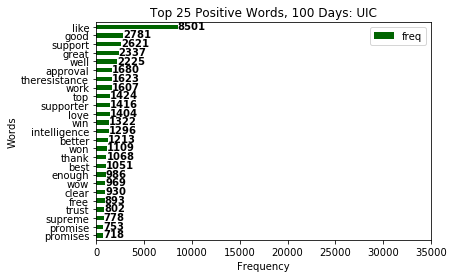

In [12]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posit = Counter(posDist)
positdf = pd.DataFrame.from_dict(posit, orient='index').reset_index()
positdf = positdf.rename(columns={'index':'word', 0:'freq'})
positdf = positdf.sort_values('freq', ascending = False)
posdf = positdf[:25]
print(posdf)

fig = posdf.plot(x= 'word',kind='barh', align='center', color =['darkgreen'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Positive Words, 100 Days: UIC')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,35000)

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('/N/u/klosteda/Karst/Text-Analysis/PresidentSentiment/results_imgs/trump100PosWordsUICv2.png', format='png', dpi=300, bbox_inches='tight',)
plt.show()


###### Negative words

breaking     fake      war     stop   attack      bad     lies     shit    wrong      lie 
    6601     2635     2608     2428     2334     1870     1287     1283     1272     1223 
             word  freq
34       breaking  6601
16           fake  2635
90            war  2608
29           stop  2428
26         attack  2334
172           bad  1870
33           lies  1287
212          shit  1283
115         wrong  1272
206           lie  1223
145          hate  1221
130         fight  1218
248       illegal  1186
188        racist  1184
46        attacks  1178
2201  wiretapping  1127
136        strike  1067
199          hell  1051
193         fraud  1046
253         lying   992
77     resistance   984
109     collusion   962
210          fuck   938
187          isis   916
43           lost   909


/N/soft/rhel6/anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


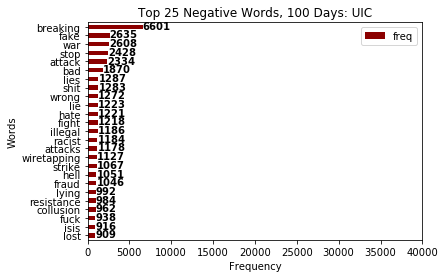

In [13]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
nega = Counter(negDist)
negadf = pd.DataFrame.from_dict(nega, orient='index').reset_index()
negadf = negadf.rename(columns={'index':'word', 0:'freq'})
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
print(negdf)

fig = negdf.plot(x= 'word',kind='barh', align='center', color =['darkred'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Negative Words, 100 Days: UIC')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,40000)

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('/N/u/klosteda/Karst/Text-Analysis/PresidentSentiment/results_imgs/trump100NegWordsUICv2.png', format='png', dpi=300, bbox_inches='tight',)

plt.show()